In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import glob
import logging
from pathlib import Path

import mat73
import numpy as np
import pandas as pd

from hb_mep.config import HBMepConfig
from hb_mep.data_access import DataClass
from hb_mep.utils import plot

PARENT_PATH = Path(os.getcwd()).parent.parent.absolute()
FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

#### Load config

In [3]:
config = HBMepConfig()
config.CURRENT_PATH = PARENT_PATH


#### Load data and preprocess

In [9]:
glob.glob(os.path.join(data.data_path, f"{PREFIX}/*auc_table.csv"))

[]

In [10]:
os.path.join(data.data_path, f"{PREFIX}/*auc_table.csv")

'/home/vishu/repos/hb-mep/data/rats_data/amap00/*/*auc_table.csv'

In [6]:
PREFIX

'rats_data/amap00/*'

In [12]:
glob.glob(os.path.join(data.data_path, f"{PREFIX}/*ep_matrix.mat"))[0]

'/home/vishu/repos/hb-mep/data/rats_data/amap01/2023-03-13_J_RCML_000/2023-03-13_J_RCML_000_ep_matrix.mat'

In [18]:
data = DataClass(config)

nMax = 5
df = None

for i in range(1, nMax):
    participant = f"amap{i:02}"
    PREFIX = f"rats_data/{participant}/*"

    fpath = glob.glob(os.path.join(data.data_path, f"{PREFIX}/*auc_table.csv"))[0]
    temp_df = pd.read_csv(fpath)

    fpath = glob.glob(os.path.join(data.data_path, f"{PREFIX}/*ep_matrix.mat"))[0]
    data_dict = mat73.loadmat(fpath)
    temp_mat = data_dict["ep_sliced"]

    temp_df["participant"] = participant
    temp_df["method"] = temp_df.channel2_laterality

    idx = temp_df.channel1_segment.isna()
    temp_df = temp_df[idx].copy()
    temp_mat = temp_mat[idx, :, :]

    if df is None:
        df = temp_df.copy()
        mat = temp_mat
    else:
        df = pd.concat([df, temp_df], ignore_index=True).copy()
        mat = np.vstack((mat, temp_mat))

df.reset_index(drop=True, inplace=True)

df, encoder_dict = data.build(df)

# df = df[df.participant.isin([0])].copy()
# # df = df[df.compound_position.isin([0, 1, 2, 5])].copy()
# df = df[df.compound_position.isin([2, 5])].copy()
# df.reset_index(drop=True, inplace=True)

2023-05-23 16:40:24,072 - hb_mep.data_access.core - INFO - Processing data ...
2023-05-23 16:40:24,080 - hb_mep.utils.utils - INFO - func:preprocess took: 0.01 sec
2023-05-23 16:40:24,081 - hb_mep.utils.utils - INFO - func:build took: 0.01 sec


In [19]:
df.shape

(1407, 44)

In [21]:
type(temp_mat)

numpy.ndarray

In [5]:


FPATH = "rats_data/amap04/2023-03-24_J_RCML_000/2023-03-24_J_RCML_000_ep_matrix.mat"

data_dict = mat73.loadmat(os.path.join(data.data_path, FPATH))

data_dict["ep_sliced"]

FPATH = "rats_data/amap04/2023-03-24_J_RCML_000/2023-03-24_J_RCML_000_auc_table.csv"

df = pd.read_csv(os.path.join(data.data_path, FPATH))

In [213]:
time.min()

-0.01

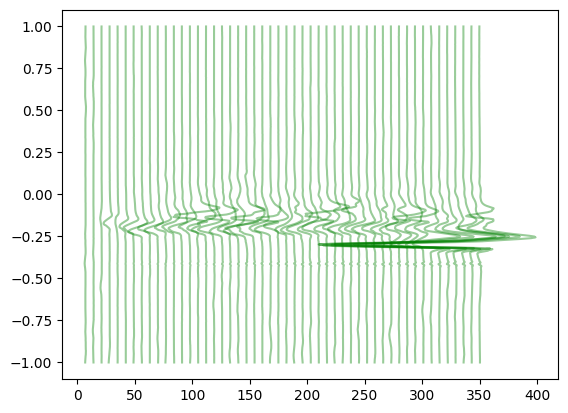

In [224]:
for i in range(temp_df.shape[0]):
    x = temp_mat[i, :, 0]/100 + temp_df.pulse_amplitude[i]
    y = np.linspace(-1, 1, x.shape[0])

    plt.plot(
        x,
        y,
        color="green",
        alpha=.4
    )

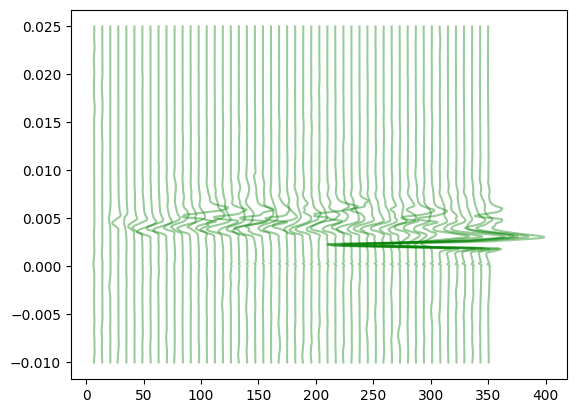

In [214]:

for i in range(temp_df.shape[0]):
    plt.plot(
        temp_mat[i, :, 0]/100 + temp_df.pulse_amplitude[i],
        time,
        color="green",
        alpha=.4
    )

In [6]:
mat = data_dict["ep_sliced"]

In [7]:
idx = df.compound_position == "-C5L"

In [18]:
temp_df = df[idx].copy()
temp_df.reset_index(drop=True, inplace=True)

temp_mat = mat[idx]

<Axes: xlabel='pulse_amplitude', ylabel='auc_1'>

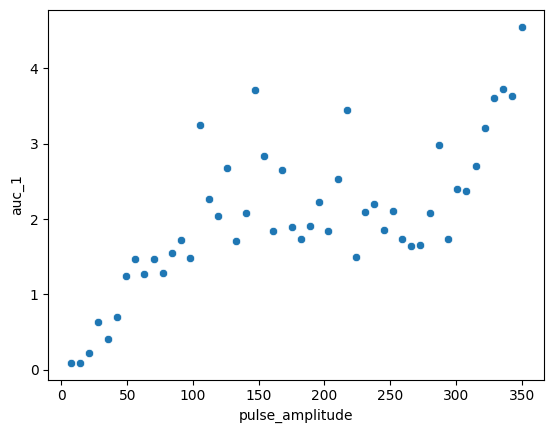

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=temp_df.pulse_amplitude, y=temp_df.auc_1)

In [65]:
temp_mat.T.shape

(8, 428, 50)

In [70]:
temp_mat[:, :, 0].T.shape

(428, 50)

In [78]:
temp_mat.shape

(50, 428, 8)

In [115]:
data_dict["t_sliced"].shape

(428,)

In [121]:
temp_mat.shape

(50, 428, 8)

In [201]:
time.max()

0.025

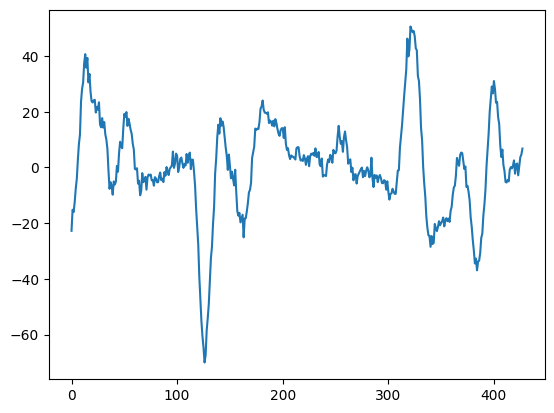

In [120]:
plt.plot(temp_mat[0, :, 0])

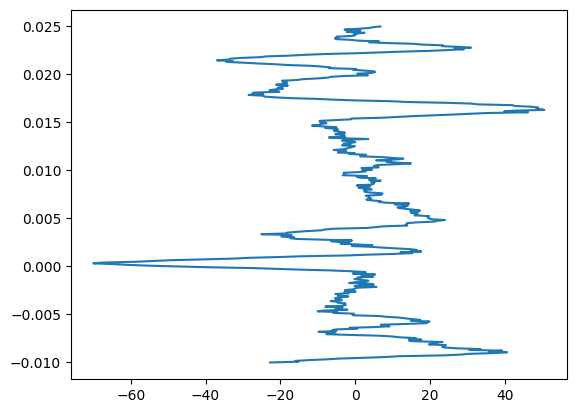

In [122]:
plt.plot(temp_mat[0, :, 0], time)

In [ ]:
plt.plot(temp_mat[])

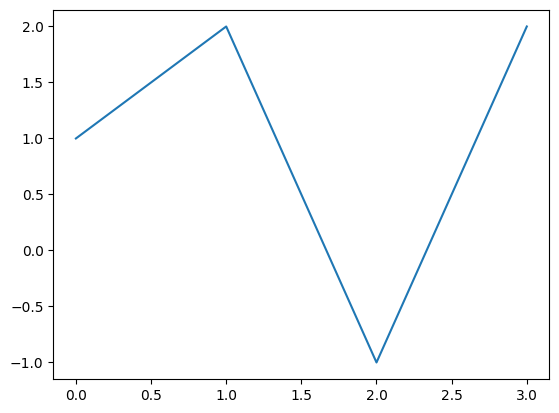

In [110]:
a = [1, 2, -1, 2]
x = range(len(a))
plt.plot(x, a)

<Axes: >

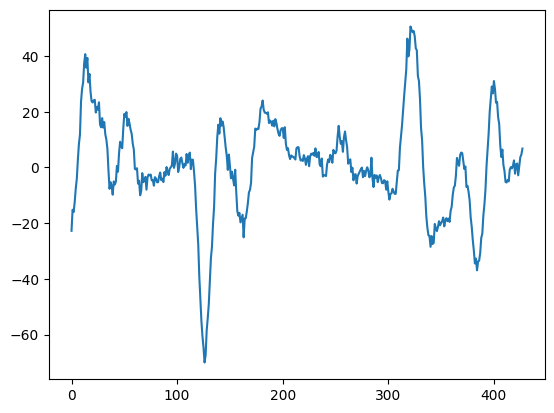

In [96]:
sns.lineplot(temp_mat[0, :, 0])

In [145]:
temp_mat[:, :, 0].shape

(50, 428)

In [156]:
temp_df.pulse_amplitude.to_numpy().reshape(-1, 1).shape

(50, 1)

In [159]:
temp_mat[:, :, 0].shape

(50, 428)

In [170]:
mat2 = temp_mat[:, :, 0]

In [185]:
v = 49

(t[v, :] == mat2[v, :] + intensity[v]).all()

True

In [174]:
t = mat2 + intensity[:, None]

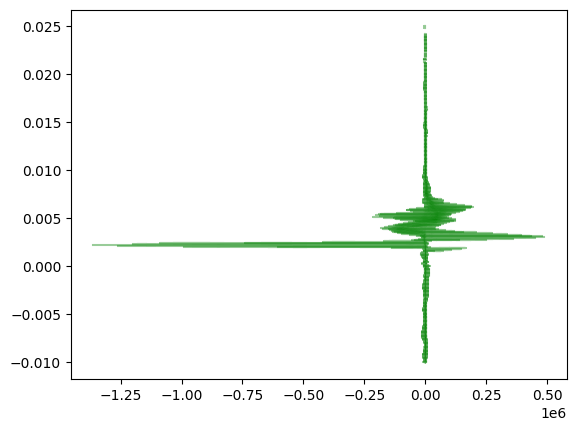

In [189]:
plt.plot(
    mat2*100 + intensity[:, None],
    np.tile(time, (temp_mat.shape[0], 1)),
    color="green",
    alpha=.4
);

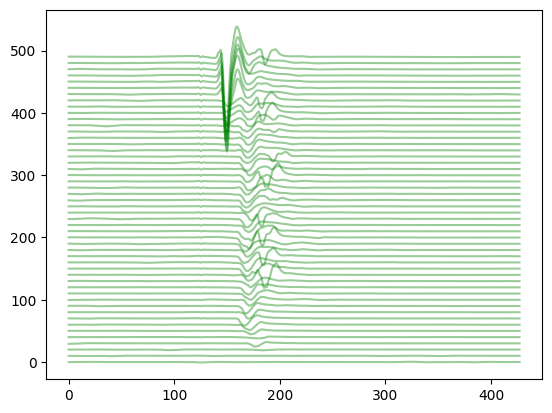

In [23]:
for i in range(temp_df.shape[0]):
    plt.plot(temp_mat[i, :, 0]/100 + i * 10, color="green", alpha=.4)


([<matplotlib.axis.YTick at 0x7f554bebfc10>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5')])

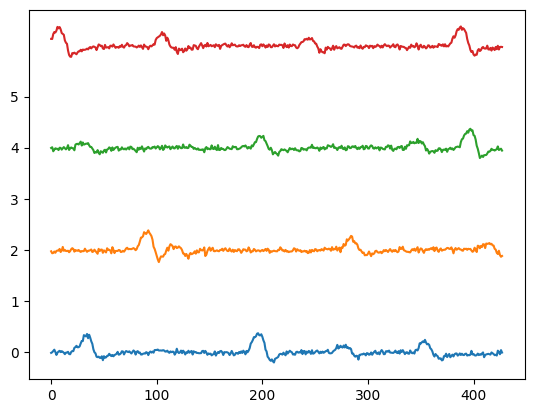

In [32]:
plt.plot(mat[0, :, 0]/80)
plt.plot(mat[1, :, 0]/80 + 2)
plt.plot(mat[2, :, 0]/80 + 4)
plt.plot(mat[3, :, 0]/80 + 6)
plt.yticks([0,1,2,3,4,5])

In [7]:
data_dict

{'auc_sliced': array([[[-1.80380530e+00, -8.79483109e-01, -1.45050271e+00, ...,
           8.49099943e-01, -8.75034502e-02, -1.52419299e+01],
         [ 1.00651559e+00,  1.91143557e+00, -2.86069451e+00, ...,
           2.69361456e+00,  6.32578407e-01, -1.80660348e+01],
         [ 1.37059943e+00,  2.41199139e+00, -3.14768675e+00, ...,
           4.12659690e+00, -6.84452180e-01, -1.46034335e+01],
         ...,
         [-1.00867469e+00, -1.64357115e+00,  7.62087514e-01, ...,
          -1.58929443e+00,  1.82068015e+00,  5.04031846e+01],
         [-4.60718557e+00,  1.44581886e+00, -3.30183922e+00, ...,
          -3.52119573e+00,  1.50509079e+00,  4.66559182e+01],
         [-1.99956783e+00,  1.61386550e-01, -5.18190638e+00, ...,
           2.32141938e+00,  7.83546803e-01,  4.21449910e+01]],
 
        [[-2.32284264e+00,  4.54835751e-01, -2.50418338e+00, ...,
           1.42306346e+00, -1.08631633e-01, -4.60475696e+01],
         [-3.11393637e-01, -2.51173115e-01, -3.03994516e-01, ...,
       

In [4]:
data = DataClass(config)

fpath = glob.glob(os.path.join(data.data_path, "rats_data/amap*/*/*.csv"))
df = None

for f in fpath:
    temp = pd.read_csv(f)

    participant = f.split("/")[-3]
    temp["participant"] = participant

    temp = temp[temp.channel1_segment.isna()].copy()

    temp["method"] = temp.channel2_laterality

    if df is None:
        df = temp.copy()
    else:
        df = pd.concat([df, temp], ignore_index=True).copy()

df.reset_index(drop=True, inplace=True)

df, encoder_dict = data.build(df)

# df = df[df.participant.isin([0])].copy()
# df = df[df.compound_position.isin([0, 1])].copy()
# df.reset_index(drop=True, inplace=True)

2023-05-23 10:31:55,890 - hb_mep.data_access.core - INFO - Processing data ...
2023-05-23 10:31:55,946 - hb_mep.utils.utils - INFO - func:preprocess took: 0.06 sec
2023-05-23 10:31:55,946 - hb_mep.utils.utils - INFO - func:build took: 0.06 sec


#### Plot data

In [5]:
# plot(df, encoder_dict=encoder_dict);

#### Initialize model

In [6]:
model = SaturatedReLU(config)

#### Run MCMC inference

In [7]:
mcmc, posterior_samples = model.run_inference(df=df)

2023-05-23 10:31:56,168 - jax._src.xla_bridge - INFO - Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
2023-05-23 10:31:56,169 - jax._src.xla_bridge - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-05-23 10:31:56,169 - jax._src.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-05-23 10:31:56,170 - jax._src.xla_bridge - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-05-23 10:31:56,170 - jax._src.xla_bridge - INFO - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-05-23 10:31:56,204 - hb_mep.models.rats.saturated_relu - INFO - Running inference with Saturat

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

#### Diagnostics

In [ ]:
mcmc.print_summary()


                           mean       std    median      5.0%     95.0%     n_eff     r_hat
             a[0,0,0]    120.75      4.95    121.75    113.17    127.99   3998.11      1.00
             a[0,1,0]    144.59     33.26    144.39     90.87    198.51  11406.64      1.00
             a[1,0,0]    144.61     33.07    144.19     89.05    196.54  11456.29      1.00
             a[1,1,0]    166.49      2.61    166.43    162.18    170.82  13906.18      1.00
            a_mean[0]    144.37     18.12    144.42    116.12    174.99   9415.34      1.00
           a_scale[0]     26.46      9.60     24.89     11.92     40.95  10312.57      1.00
             b[0,0,0]      0.01      0.00      0.01      0.01      0.01   5300.74      1.00
             b[0,1,0]      0.02      0.03      0.01      0.00      0.04  13128.41      1.00
             b[1,0,0]      0.02      0.03      0.01      0.00      0.04  13251.91      1.00
             b[1,1,0]      0.01      0.00      0.01      0.01      0.01  14239.

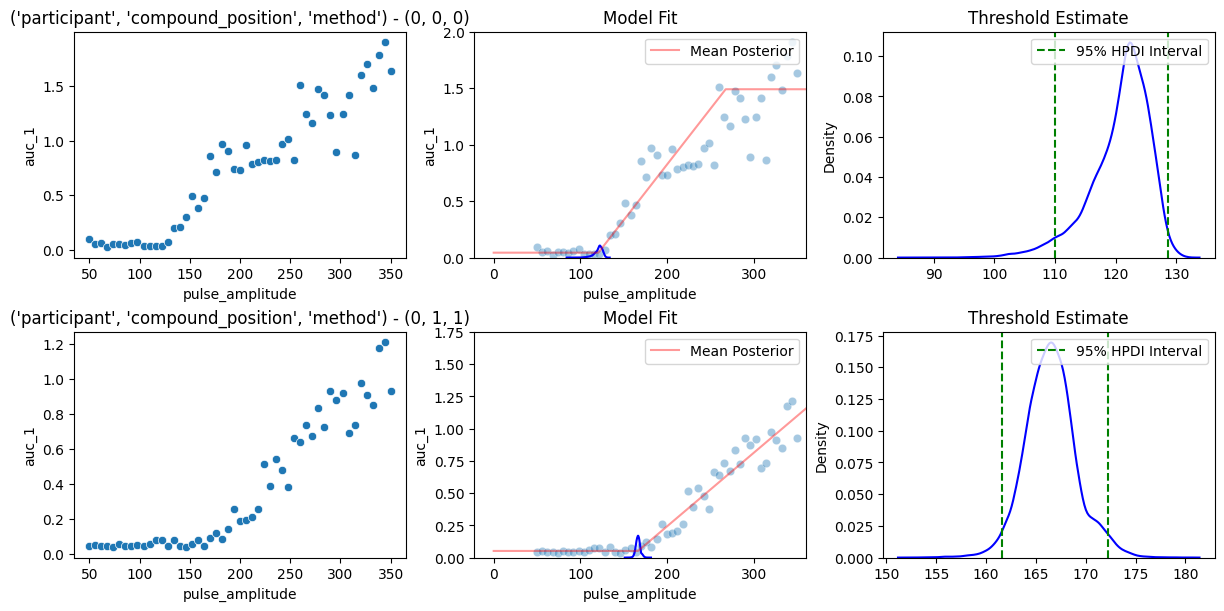

In [ ]:
model.plot(df=df, posterior_samples=posterior_samples);